# Проект: Анализ игровой индустрии для построения стратегии

От интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры поступил заказ на выполнение аналитических работ. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Исполнителю, т.е. нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

На анализ были предоставлены данные до 2016 года. Представим, что сейчас декабрь 2016 г., и заказчик планирует кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируются продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


# Порядок выполнения проекта:

1. Загрузить данные и изучить общую информацию

2. Подготовить данные

3. Проести EDA

4. Составить портрет пользователя каждого региона

5. Проверьте гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые; средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

6. Написать вывод

## Загрузка файла с данными и изучение общей информации

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats as st
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format

try:
    df = pd.read_csv('/datasets/games.csv')
    
except:
    df = pd.read_csv('games.csv')

    


Вывод общей информации:

In [2]:
df.info()
display(df.head())
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


(16715, 11)

Проверка на пропуски и дубликаты:

In [3]:
display(df.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [4]:
print(df.duplicated().sum())

0


**Вывод:**

В датасете 16715 строк и 11 показателей. 

Пропуски есть в name и genre - по 2, year_of_release - 269, critic_score - 8578, user_score - 6701 и rating - 6766

Полных дубликатов в строках не обнаружено

## Подготовка данных

### Замена названия столбцов (приведение к нижнему регистру):

In [5]:
df.columns = map(str.lower, df.columns)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
for column_name in ["name", "platform", 'genre']:
    df[column_name] = df[column_name].str.lower()
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,"2,006.00",sports,41.36,28.96,3.77,8.45,76.00,8,E
1,super mario bros.,nes,"1,985.00",platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,"2,008.00",racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,wii sports resort,wii,"2,009.00",sports,15.61,10.93,3.28,2.95,80.00,8,E
4,pokemon red/pokemon blue,gb,"1,996.00",role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Переименуем колонку rating на rating_esrb

In [7]:
df = (df.rename(columns={'rating':'rating_esrb'}))

In [8]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
0,wii sports,wii,"2,006.00",sports,41.36,28.96,3.77,8.45,76.00,8,E
1,super mario bros.,nes,"1,985.00",platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,"2,008.00",racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,wii sports resort,wii,"2,009.00",sports,15.61,10.93,3.28,2.95,80.00,8,E
4,pokemon red/pokemon blue,gb,"1,996.00",role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование данных в нужные типы. 

Прежде чем менять тип данных обработаем пропуски в колонке year_of_release:

Применим функцию для заполнения пропусков:

In [9]:
df_gr = df.groupby('name')['year_of_release'].min()
 
 
def year(row):
    name = row['name']
    if name in df_gr.index:
        return df_gr[name]
    return 0
 
df.loc[df['year_of_release'].isna(), 'year_of_release'] = df.loc[df['year_of_release'].isna()].apply(year, axis = 1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16569 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating_esrb      9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Оставшиеся 146 пропусков удаляем, сильного влияния на последующий анализ они оказать не должны:

In [11]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

Меняем тип данных в колонке year_of_release на Int32

In [12]:
df['year_of_release'] = df['year_of_release'].astype('Int32')

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16569 entries, 0 to 16568
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16569 non-null  object 
 2   year_of_release  16569 non-null  Int32  
 3   genre            16567 non-null  object 
 4   na_sales         16569 non-null  float64
 5   eu_sales         16569 non-null  float64
 6   jp_sales         16569 non-null  float64
 7   other_sales      16569 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating_esrb      9868 non-null   object 
dtypes: Int32(1), float64(5), object(5)
memory usage: 1.3+ MB


### Обработка пропусков:





Обработка 'tbd' в колонке user_score. Основываясь на своем опыте я бы расшифровал данное сокращение как 'to be done' - т.е. оценка пользователей еще не проставлена, возможно в виду отсутствия такой информации в открытых  источниках. Таких комментариев в датафрейме 2398

In [14]:
df[df['user_score'] == 'tbd']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
119,zumba fitness,wii,2010,sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,namco museum: 50th anniversary,ps2,2005,misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
519,zumba fitness 2,wii,2011,sports,1.51,1.03,0.00,0.27,NaN,tbd,T
643,udraw studio,wii,2010,misc,1.65,0.57,0.00,0.20,71.00,tbd,E
715,just dance kids,wii,2010,misc,1.52,0.54,0.00,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16549,planet monsters,gba,2001,action,0.01,0.00,0.00,0.00,67.00,tbd,E
16551,bust-a-move 3000,gc,2003,puzzle,0.01,0.00,0.00,0.00,53.00,tbd,E
16552,mega brain boost,ds,2008,puzzle,0.01,0.00,0.00,0.00,48.00,tbd,E
16558,plushees,ds,2008,simulation,0.01,0.00,0.00,0.00,NaN,tbd,E


Заменим в столбце user_score тип данных на float

In [15]:
df[df['user_score'] == 'tbd'].count()

name               2394
platform           2394
year_of_release    2394
genre              2394
na_sales           2394
eu_sales           2394
jp_sales           2394
other_sales        2394
critic_score       1069
user_score         2394
rating_esrb        2344
dtype: int64

Поменяем 'tbd' на NaN так как рейтинга и правда в этих ячейках нет, также - иначе не отформатировать во float

In [16]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float')

Заполним пропуски в critic_score и user_score индикаторным значением -1.

In [17]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)

In [18]:
print('Количество пропусков в столбце critic_score - {}'.format(df['critic_score'].isnull().sum()))
print('Количество пропусков в столбце user_score - {}'.format(df['user_score'].isnull().sum()))

Количество пропусков в столбце critic_score - 0
Количество пропусков в столбце user_score - 0


Пропуски в name и genre:

In [19]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
656,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,-1.00,-1.00,NaN
14127,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,-1.00,-1.00,NaN


В 1993 году на платформе GEN не выпускали игры с продажами в NA. Поэтому считаю что это ошибка. В 1992 году с аналогичной структурой продаж и такой же платформе выпускалась игра Mortal Kombat

In [20]:
df.loc[(df['year_of_release'] == 1992) & (df['name'] == 'mortal kombat')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb
563,mortal kombat,gen,1992,fighting,1.95,0.63,0.00,0.09,-1.00,-1.00,NaN


In [21]:
df.loc[(df['year_of_release'] == 1993) & (df['name'].isna()), 'name'] = 'mortal kombat'
df.loc[(df['year_of_release'] == 1993) & (df['name'] == 'mortal kombat'), 'genre'] = 'fighting'


### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

Продажи по регионам:

In [22]:
df_sales_na = df['na_sales'].sum()//1
df_sales_eu = df['eu_sales'].sum()//1
df_sales_jp = df['jp_sales'].sum()//1
df_sales_other = df['other_sales'].sum()//1

print('Продажи в Северной Америке:', df_sales_na)
print('Продажи в Европейском союзе:', df_sales_eu)
print('Продажи в Японии:', df_sales_jp)
print('Продажи в прочих регионах:', df_sales_other)



Продажи в Северной Америке: 4375.0
Продажи в Европейском союзе: 2416.0
Продажи в Японии: 1292.0
Продажи в прочих регионах: 788.0


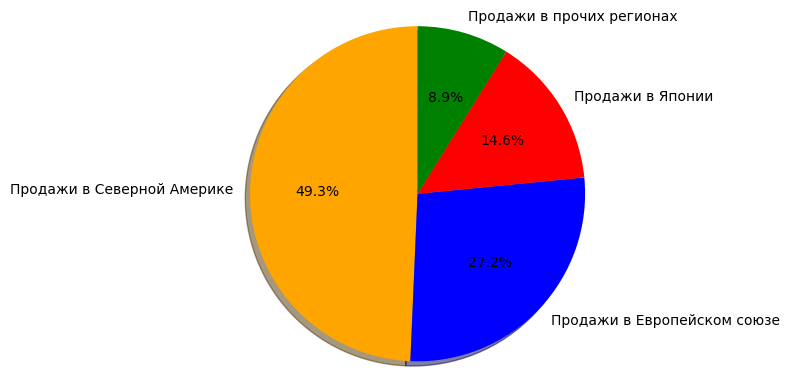

In [23]:
labels = 'Продажи в Северной Америке', 'Продажи в Европейском союзе', 'Продажи в Японии', 'Продажи в прочих регионах'
sizes = [4375, 2416, 1292, 788]
fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0) 
colors = ( "orange", "blue", "red", 
          "green")
ax1.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()



Самые высокие продажи за все время наблюдений у Северной Америки - 4375 млн игр (49.3%), Европа на втором месте - 2416 млн (27.2%), далее Япония с продажами 1292 млн (14.6%) и на последнем месте продажи в прочих регионах - 788 млн (8.9%) 

Добавим колонку с совокупными продажами:

In [24]:
df['sales_total'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,sales_total
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.00,-1.00,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,NaN,31.38


## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Определим важны ли данные за все периоды

In [25]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


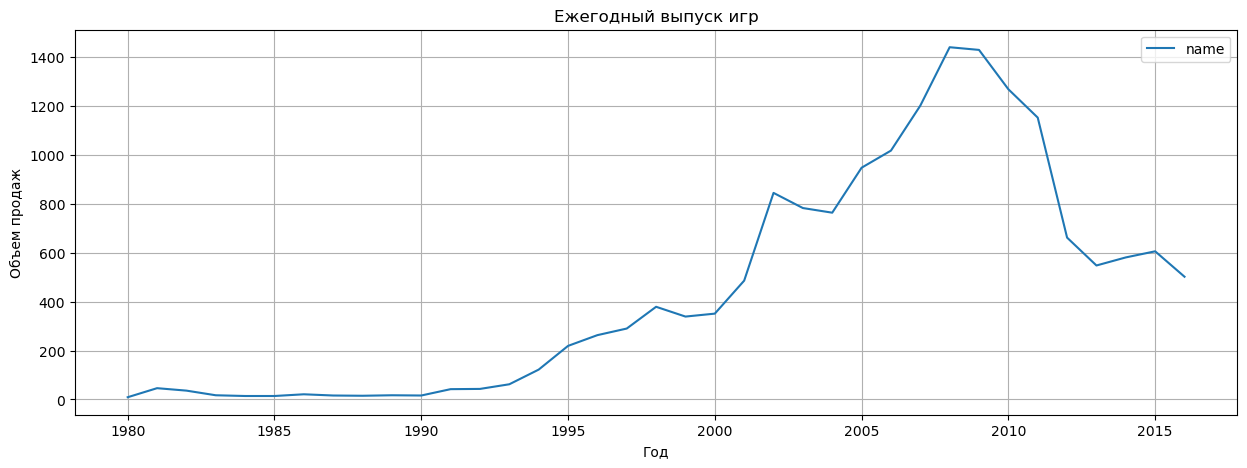

In [26]:
(
    df
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(title='Ежегодный выпуск игр', xlabel='Год', ylabel='Объем продаж', grid=True, style='-', figsize=(15, 5))
);



Наблюдаем следующую ежегодную динамику продаж игр на всех платформах:

1. С 1980 по 1990 гг наблюдаем отсутствие какого либо, позитивного/негативного прогресса - плато.
2. Начина с 1991 начинается рост количества продаваемых игр с 41 млн в 1991 г. до 1 440 млн игр в 2008 г., с небольшими коррекциями в 1999 и 2003 гг. В большинстве своем такая динамика связана с полпулярностью платформы Play Station (один, два и ее портативной версии PSP) и платформы Nintendo версий DS и Wii.
3. Начиная с 2009 г. данные показывают негативную динамикуб с 1 430 млн игр в 2009 до 502 млн игр в 2015. В 2014-15 гг наблюдается небольшое восстановление рынка. Предположительно падение связано с развитием мобильных платформ.


Наиболее релевантными для нашей задачи буду данные за период начиная с 2008 г - период с которого начался тренд на снижение продаж. Также данный срок соответствует среднему жизненному циклу платформ, который будет определен ниже

### Посмотрим, как менялись продажи по платформам. Определим платформы с наибольшими суммарными продажами и построим распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы

Выведем на экран и визуализируем графически продажи по платформам:

Продажи по платформам:
          sales_total  share
platform                    
ps2          1,247.16   0.14
x360           966.61   0.11
ps3            935.19   0.11
wii            903.31   0.10
ds             804.28   0.09
ps             727.58   0.08
ps4            314.14   0.04
gba            313.73   0.04
psp            293.57   0.03
pc             258.86   0.03
3ds            258.53   0.03
xb             256.69   0.03
gb             254.43   0.03
nes            251.05   0.03
n64            218.48   0.02
snes           200.04   0.02
gc             198.66   0.02
xone           159.32   0.02
2600            89.01   0.01
wiiu            82.19   0.01
psv             53.81   0.01
sat             33.59   0.00
gen             30.77   0.00
dc              15.95   0.00
scd              1.86   0.00
ng               1.44   0.00
ws               1.42   0.00
tg16             0.16   0.00
3do              0.10   0.00
gg               0.04   0.00
pcfx             0.03   0.00


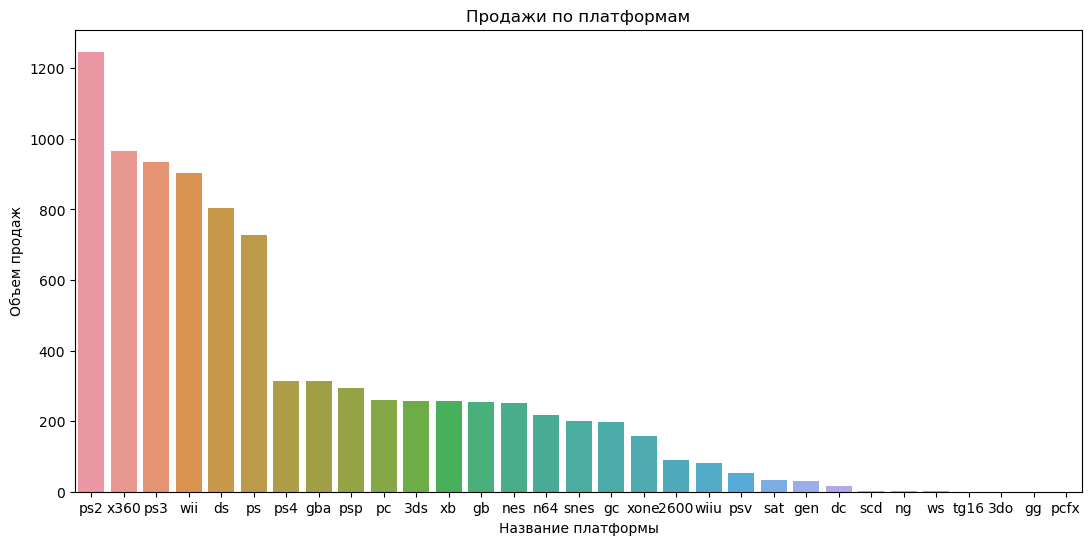

In [27]:
print('Продажи по платформам:')
sales_platform = df.pivot_table(index='platform', values='sales_total', aggfunc='sum')\
.sort_values('sales_total', ascending=False)
sales_platform['share'] = sales_platform['sales_total'] / sales_platform['sales_total'].sum()
print(sales_platform)

plt.figure(figsize=(13,6))
sns.barplot(x=sales_platform.index,y=sales_platform['sales_total'])
plt.title("Продажи по платформам")
plt.xlabel("Название платформы")
plt.ylabel("Объем продаж");

Выведем на экран платформы с максимальными продажами. Я вывел список платформ котрые дали 80% от совокупных продаж

In [28]:
sales_platform.head(11)

,sales_total,share
platform,,
ps2,"1,247.16",0.14
x360,966.61,0.11
ps3,935.19,0.11
wii,903.31,0.10
ds,804.28,0.09
ps,727.58,0.08
ps4,314.14,0.04
gba,313.73,0.04
psp,293.57,0.03


Видим, что в лидерах у нас PS2, X360, PS3, Wii, DS. Также отметим, что все версии Play Station (за исключением PSV) входят в топ-10 по объемам продаж.

Построим график с распределением продаж по годам

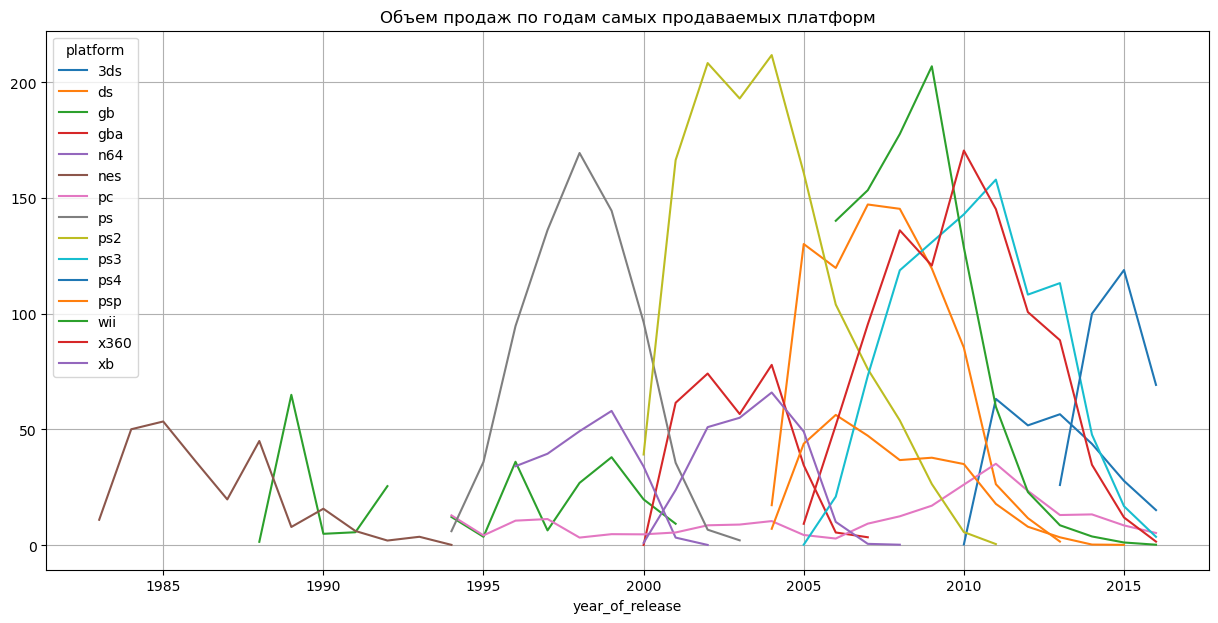

In [29]:
platform_totalsales = df.pivot_table(index='platform', values='sales_total', aggfunc='sum').nlargest(15, 'sales_total').index

df.query('platform in @platform_totalsales').\
pivot_table(index = 'year_of_release', columns = 'platform', values= 'sales_total', aggfunc = 'sum').\
plot(title='Объем продаж по годам самых продаваемых платформ', grid=True, figsize = (15,7));


Практически у всех плаформ, кроме PS4, происходит падение продаж к концу 2016 года, практически до минимума. PS4 начал 2016 год с максимального уровня продаж и упал к концу 2016 до 70 млн игр.

Жизненный цикл платформ:

In [30]:
df_sale_platform = df.pivot_table(index='year_of_release', columns='platform', values='sales_total', aggfunc='sum')

In [31]:
arr_platform = []
arr_exist = []
for i in df_sale_platform.columns:
    arr_platform.append(i)
    arr_exist.append(df_sale_platform[i].count())
dict_platform = {"Platform": arr_platform, 'Years_exist':arr_exist}
df_sale_time_exist = pd.DataFrame(dict_platform)

df_sale_time_exist.sort_values(by='Years_exist', ascending=False).head(15)

,Platform,Years_exist
13,pc,26
5,gb,13
17,ps3,13
16,ps2,13
11,nes,12
28,x360,12
19,psp,12
0,2600,11
25,wii,11
4,ds,11


In [32]:
print('Средний жизненный цикл платформ:', df_sale_time_exist.sort_values(by='Years_exist', ascending=False).mean())
print('Медиана жизненного цикла платформ:', df_sale_time_exist.sort_values(by='Years_exist', ascending=False).median())

Средний жизненный цикл платформ: Years_exist   7.90
dtype: float64
Медиана жизненного цикла платформ: Years_exist   8.00
dtype: float64


C:\Users\Mi\AppData\Local\Temp\ipykernel_26384\2148364336.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('Средний жизненный цикл платформ:', df_sale_time_exist.sort_values(by='Years_exist', ascending=False).mean())
C:\Users\Mi\AppData\Local\Temp\ipykernel_26384\2148364336.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('Медиана жизненного цикла платформ:', df_sale_time_exist.sort_values(by='Years_exist', ascending=False).median())


Средний жизненный цикл платформ около 8 лет.

### Для последующего анализа необходимо использовать данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год

Думаю, что имеет смысл взять максимально короткий отрезок времени чтобы исключить влияние платформ у которых закорчился жизненный цикл и увидеть динамику актуальных

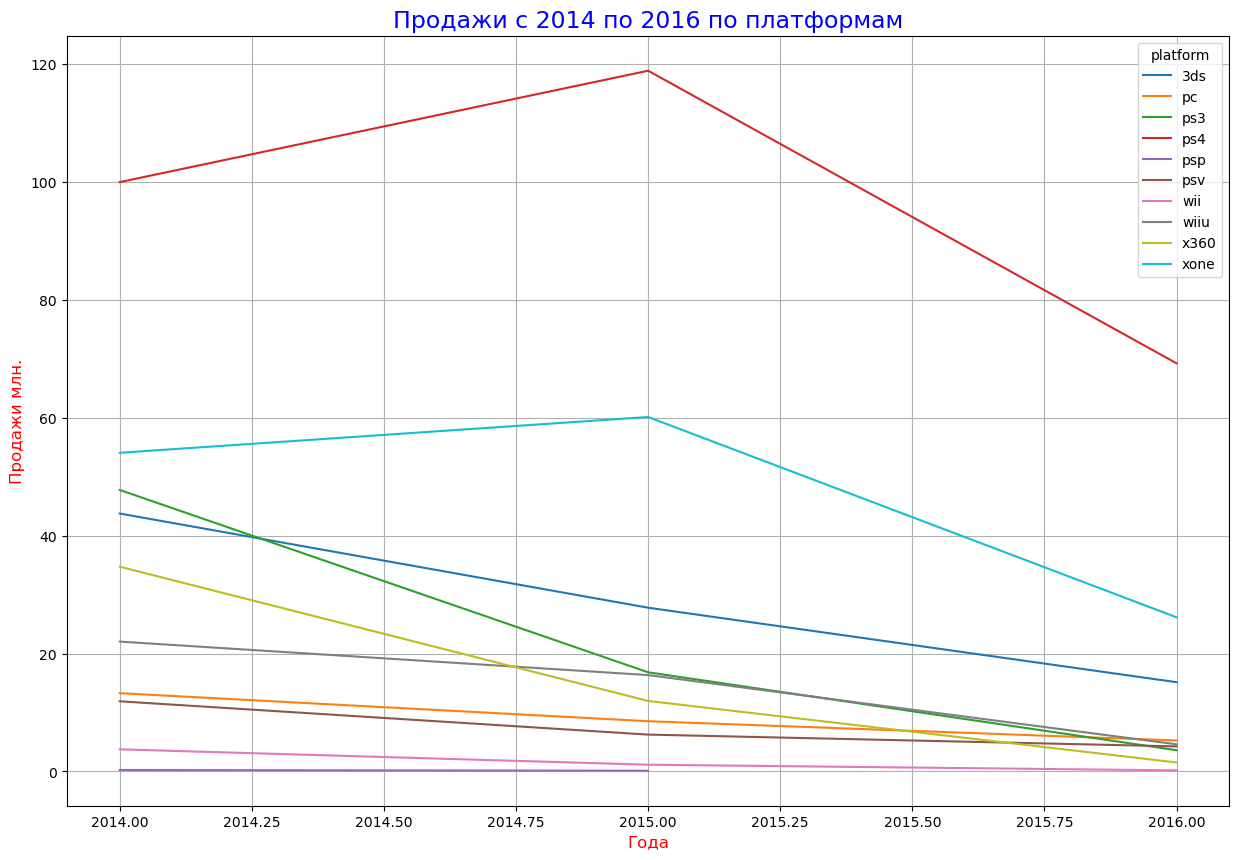

In [33]:
df_from_2014 = (df[df['year_of_release'] >=2014])
pd.pivot_table(df_from_2014, index='year_of_release', columns='platform', values='sales_total', aggfunc='sum').plot(figsize=(15,10))
plt.grid(True)
plt.title('Продажи с 2014 по 2016 по платформам', fontsize=17, color='blue')
plt.xlabel('Года',fontsize=12, color='red')
plt.ylabel('Продажи млн.',fontsize=12, color='red')
plt.show()

**Оборот по платформам за период с 2014 по 2016 год**

In [34]:
df_sales_from_2014 = df_from_2014.groupby(['platform']).agg({'sales_total':'sum'})

print(df_sales_from_2014.sort_values(by='sales_total', ascending=False).head(15))

          sales_total
platform             
ps4            288.15
xone           140.36
3ds             86.68
ps3             68.18
x360            48.22
wiiu            42.98
pc              27.05
psv             22.40
wii              5.07
psp              0.36


### Определяем какие платформы лидируют по продажам, растут или падают". Выбираем несколько потенциально прибыльных платформ.

Учитывая негативную динамику в отрасли начиная с 2009 года, а также зависимость рынка от жизненного цикла игровых платформ, я бы сузил горизонт анализа до периода 2014 - 2016 гг.

1. В частности, в 2014 году на рынок выходят две новые платформы - PS4 и XOne (Xbox One), которые с самого старта продаж в течении следующих двух лет демонстрируют рост продаж в 4.5 и 3.2 раза, что придавало некий оптимизм развитию отрасли

2. В 2014 незначительный в сравнении с 2013 годом, показывают рост такие платформы как PC, PSV и WiiU

3. 2015 и 2016 год характерезуются, практически по всем платформам, снижением продаж. Кроме того в 2015 году у PSP заканчивается жизненный цикл, а динамика у заменившего его PSV также не внушает оптимизма.  



С точки зрения перспективности при формировании стратегии на 2017 год, я бы сделал ставку на следующие платформы: PS4, 3DS, XOne, PSV и РС.

### Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам и описываем  результат

In [35]:
df_from_2014['sales_total'].describe()

count   1,689.00
mean        0.43
std         1.06
min         0.01
25%         0.03
50%         0.10
75%         0.35
max        14.63
Name: sales_total, dtype: float64

Рисуем ящик по глобальным продажам всех платформ:

In [36]:
df_from_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16568
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int32  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   float64
 9   user_score       1689 non-null   float64
 10  rating_esrb      940 non-null    object 
 11  sales_total      1689 non-null   float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 166.6+ KB


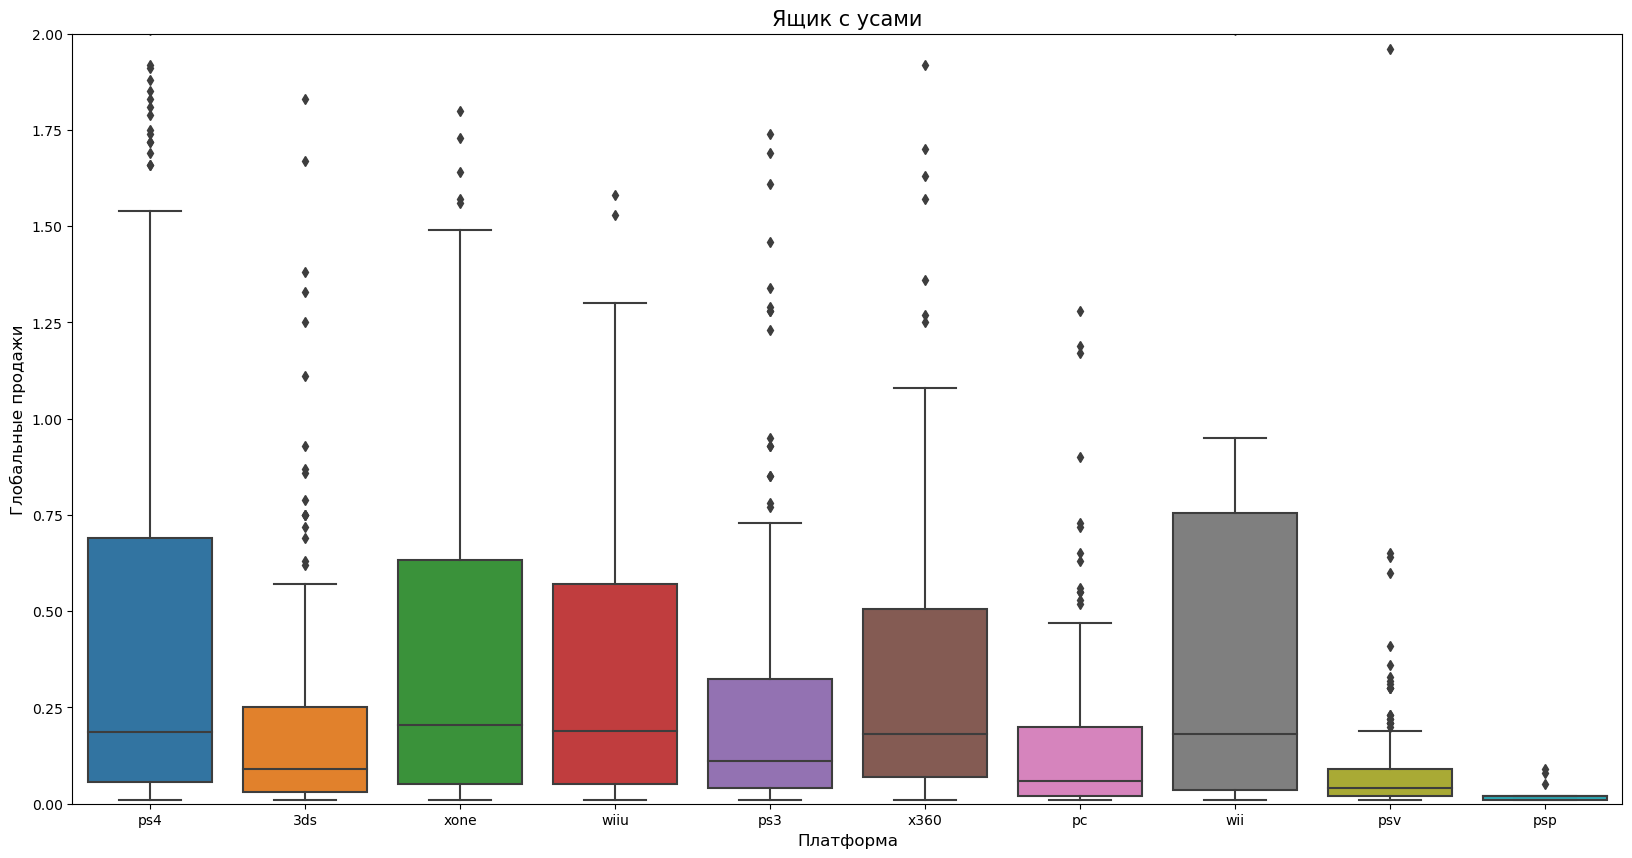

In [37]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_from_2014, x='platform', y='sales_total')
plt.title('Ящик с усами', fontsize=15)
plt.ylim(0, 2)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

**Вывод:**

Данные по глобальным продажам игр в разбивке по платформам сильно разбросанные, практически все самые прибыльные платформы с высокой выручкой находяться вне пределов усов в зоне выбросов

разница в средних продажах тоже большая

первая тройка платформ лидирует с очень большим отрывом

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

In [38]:
df_sales_from_2014.sort_values(by='sales_total', ascending=False).head(5)

,sales_total
platform,
ps4,288.15
xone,140.36
3ds,86.68
ps3,68.18
x360,48.22


Самая популярная платформа PS4. С нее и начнем:

In [39]:
df_ps4_2014 = df_from_2014[(df_from_2014['platform'] == 'ps4') & (df_from_2014['critic_score'] > 0) & (df_from_2014['user_score'] > 0)]
df_ps4_scatter_matrix =df_ps4_2014[['sales_total', 'critic_score', 'user_score']]
print(df_ps4_scatter_matrix.head())

     sales_total  critic_score  user_score
42         12.62         97.00        8.30
77          8.58         82.00        4.30
92          7.66         83.00        5.70
94          7.60         85.00        5.00
105         7.17         87.00        6.50


Платформа PS4
              sales_total  critic_score  user_score
sales_total          1.00          0.40       -0.04
critic_score         0.40          1.00        0.55
user_score          -0.04          0.55        1.00

Платформа PS4


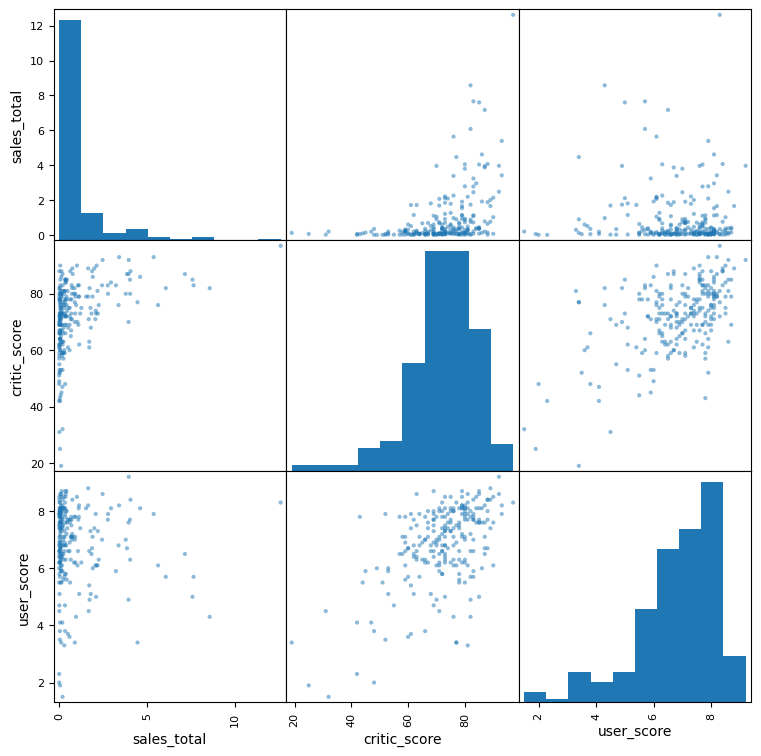

In [40]:
print('Платформа PS4')
print(df_ps4_scatter_matrix.corr())
print()
print('Платформа PS4')
pd.plotting.scatter_matrix(df_ps4_scatter_matrix, figsize=(9, 9), grid=True);



In [41]:
print('Корреляция оценок критиков и продаж:', df_ps4_2014['critic_score'].corr(df_ps4_2014['sales_total']).round(3))
print('Корреляция оценок пользователей и продаж:', df_ps4_2014['user_score'].corr(df_ps4_2014['sales_total']).round(3))
print('Корреляция оценок критиков и оценок пользователей:', df_ps4_2014['critic_score'].corr(df_ps4_2014['user_score']).round(3))


Корреляция оценок критиков и продаж: 0.402
Корреляция оценок пользователей и продаж: -0.043
Корреляция оценок критиков и оценок пользователей: 0.546


**Вывод:**

У платформы PS4 отсутствует корреляция между оценками и объемом продаж, при этом есть умеренная корреляция между оценками пользователей и оценками критиков

### Соотнесем оценки с продажами игр на других платформах.

In [42]:
df_xone_2014 = df_from_2014[(df_from_2014['platform'] == 'xone') & (df_from_2014['critic_score'] > 0) & (df_from_2014['user_score'] > 0)]
df_xone_scatter_matrix =df_xone_2014[['sales_total', 'critic_score', 'user_score']]
print(df_xone_scatter_matrix.head())

     sales_total  critic_score  user_score
165         5.47         97.00        7.90
179         5.26         81.00        5.40
242         4.49         84.00        6.40
270         4.22         88.00        6.20
373         3.50         72.00        4.10


Платформа XOne
              sales_total  critic_score  user_score
sales_total          1.00          0.42       -0.09
critic_score         0.42          1.00        0.44
user_score          -0.09          0.44        1.00

Платформа XOne


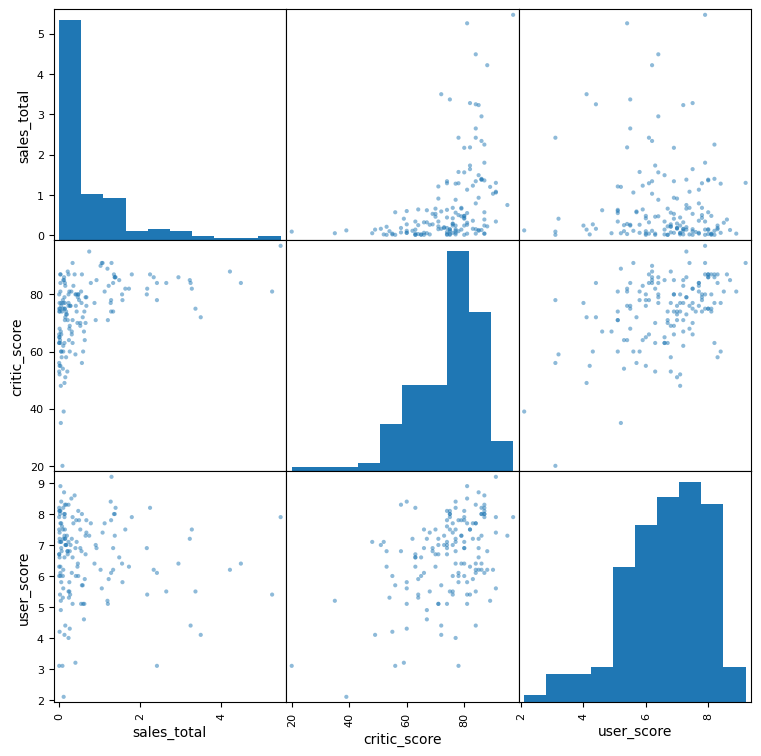

In [43]:
print('Платформа XOne')
print(df_xone_scatter_matrix.corr())
print()
print('Платформа XOne')
pd.plotting.scatter_matrix(df_xone_scatter_matrix, figsize=(9, 9), grid=True);

In [44]:
print('Корреляция оценок критиков и продаж:', df_xone_2014['critic_score'].corr(df_xone_2014['sales_total']).round(3))
print('Корреляция оценок пользователей и продаж:', df_xone_2014['user_score'].corr(df_xone_2014['sales_total']).round(3))
print('Корреляция оценок критиков и оценок пользователей:', df_xone_2014['critic_score'].corr(df_xone_2014['user_score']).round(3))


Корреляция оценок критиков и продаж: 0.422
Корреляция оценок пользователей и продаж: -0.092
Корреляция оценок критиков и оценок пользователей: 0.441


In [45]:
df_3ds_2014 = df_from_2014[(df_from_2014['platform'] == '3ds') & (df_from_2014['critic_score'] > 0) & (df_from_2014['user_score'] > 0)]
df_3ds_scatter_matrix =df_3ds_2014[['sales_total', 'critic_score', 'user_score']]
print(df_3ds_scatter_matrix.head())

      sales_total  critic_score  user_score
312          3.89         86.00        8.70
457          3.05         66.00        6.90
674          2.34         89.00        9.00
948          1.83         80.00        8.80
1389         1.38         64.00        6.10


Платформа 3DS
              sales_total  critic_score  user_score
sales_total          1.00          0.28        0.28
critic_score         0.28          1.00        0.86
user_score           0.28          0.86        1.00

Платформа 3DS


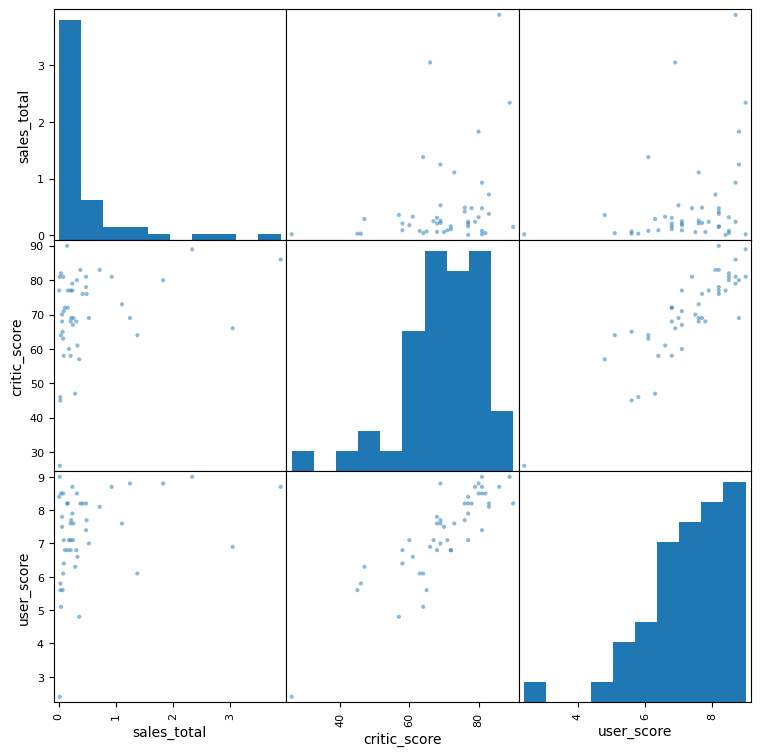

In [46]:
print('Платформа 3DS')
print(df_3ds_scatter_matrix.corr())
print()
print('Платформа 3DS')
pd.plotting.scatter_matrix(df_3ds_scatter_matrix, figsize=(9, 9), grid=True);

In [47]:
print('Корреляция оценок критиков и продаж:', df_3ds_2014['critic_score'].corr(df_3ds_2014['sales_total']).round(3))
print('Корреляция оценок пользователей и продаж:', df_3ds_2014['user_score'].corr(df_3ds_2014['sales_total']).round(3))
print('Корреляция оценок критиков и оценок пользователей:', df_3ds_2014['critic_score'].corr(df_3ds_2014['user_score']).round(3))


Корреляция оценок критиков и продаж: 0.285
Корреляция оценок пользователей и продаж: 0.28
Корреляция оценок критиков и оценок пользователей: 0.862


In [48]:
df_ps3_2014 = df_from_2014[(df_from_2014['platform'] == 'ps3') & (df_from_2014['critic_score'] > 0) & (df_from_2014['user_score'] > 0)]
df_ps3_scatter_matrix =df_ps3_2014[['sales_total', 'critic_score', 'user_score']]
print(df_ps3_scatter_matrix.head())

      sales_total  critic_score  user_score
1525         1.28         72.00        7.50
1543         1.28         91.00        8.10
2222         0.93         80.00        6.80
2234         0.93         85.00        8.50
2599         0.78         55.00        3.10


Платформа PS3
              sales_total  critic_score  user_score
sales_total          1.00          0.45        0.16
critic_score         0.45          1.00        0.69
user_score           0.16          0.69        1.00

Платформа PS3


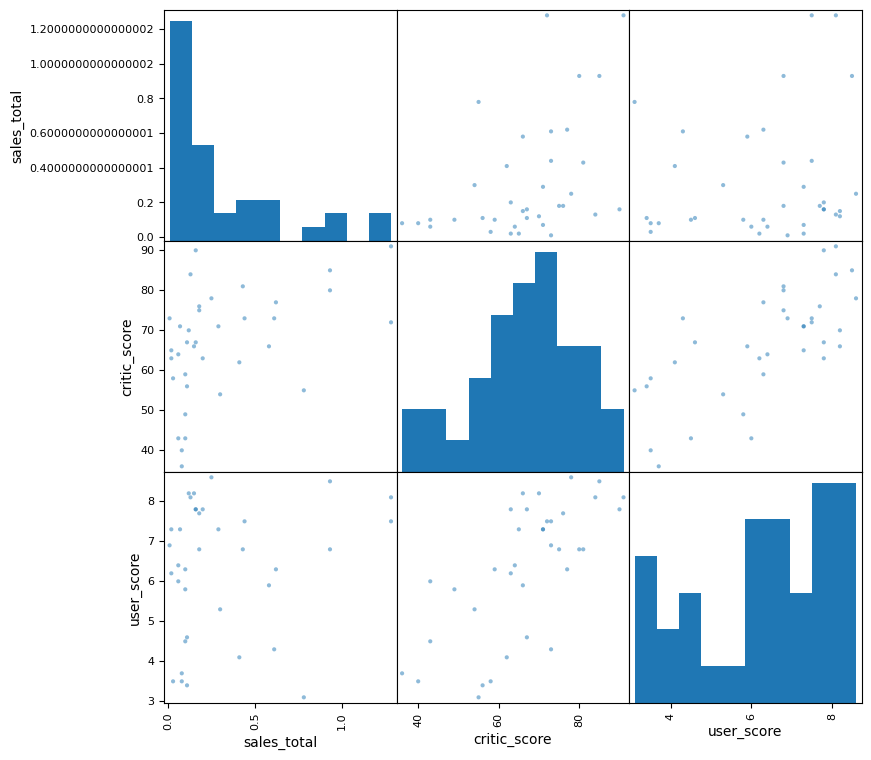

In [49]:
print('Платформа PS3')
print(df_ps3_scatter_matrix.corr())
print()
print('Платформа PS3')
pd.plotting.scatter_matrix(df_ps3_scatter_matrix, figsize=(9, 9), grid=True);

In [50]:
print('Корреляция оценок критиков и продаж:', df_ps3_2014['critic_score'].corr(df_ps3_2014['sales_total']).round(3))
print('Корреляция оценок пользователей и продаж:', df_ps3_2014['user_score'].corr(df_ps3_2014['sales_total']).round(3))
print('Корреляция оценок критиков и оценок пользователей:', df_ps3_2014['critic_score'].corr(df_ps3_2014['user_score']).round(3))


Корреляция оценок критиков и продаж: 0.447
Корреляция оценок пользователей и продаж: 0.157
Корреляция оценок критиков и оценок пользователей: 0.693


**Вывод:**

По всем рассмотренным платформам взаимосвязь между продажами и оценками практически отсутствует.
И на против, есть умеренная корреляция между оценками критиков и игроков (за исклю платформы XOne)

Посмотрим на общее распределение игр по жанрам. Ответим на вопросы: 
* Что можно сказать о самых прибыльных жанрах?
* Выделяются ли жанры с высокими и низкими продажами?

In [51]:
df_genre_rating = (df_from_2014.groupby(['genre']).agg({'sales_total':'sum'})
                   .sort_values(by='sales_total', ascending=False))
df_genre_rating = df_genre_rating.reset_index()
df_genre_rating

,genre,sales_total
0,action,199.36
1,shooter,170.94
2,sports,109.48
3,role-playing,101.44
4,misc,37.55
5,fighting,28.22
6,racing,27.52
7,platform,18.09
8,adventure,17.55
9,simulation,13.13


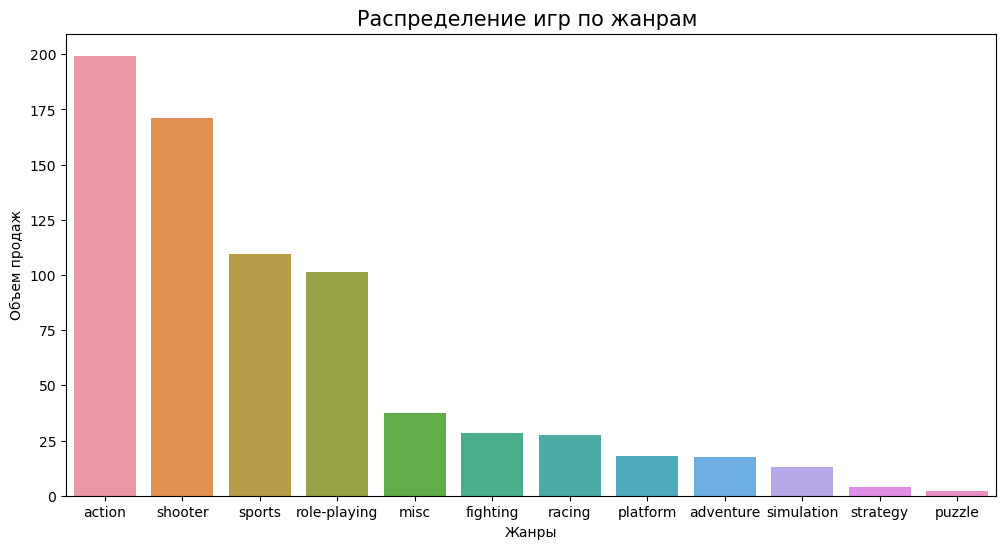

In [52]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=df_genre_rating, x='genre', y='sales_total')
plt.xlabel('Жанры',fontsize=10)
plt.ylabel('Объем продаж',fontsize=10);

**Промежуточный вывод:**

Топ-5 по глобальным продажам попали в порядке убывания Action, Shooter, Sports, Role-Playing и Misc. На эти жанры надо будет делать ставку при формировании стратеги на 2017 год

In [53]:
genre_sales = df_from_2014.groupby('genre').agg({'name': 'count', 'sales_total': 'sum'}).\
sort_values(by='sales_total', ascending=False)
genre_sales['avo_sales_perGame'] = genre_sales['sales_total'] / genre_sales['name']
print(genre_sales.sort_values('avo_sales_perGame', ascending=False))


              name  sales_total  avo_sales_perGame
genre                                             
shooter        128       170.94               1.34
sports         161       109.48               0.68
platform        38        18.09               0.48
fighting        60        28.22               0.47
role-playing   221       101.44               0.46
racing          69        27.52               0.40
misc           113        37.55               0.33
action         619       199.36               0.32
simulation      44        13.13               0.30
puzzle          14         2.21               0.16
strategy        37         3.96               0.11
adventure      185        17.55               0.09


Но при этом если смотреть сколько в среднем продаж генерит релиз одной игры, на первое место выходят жанры shooter и sports. А вот action "улетает" на 8е место. Ниже диаграмма размаха с выбросами, отчасти визуализирует это:

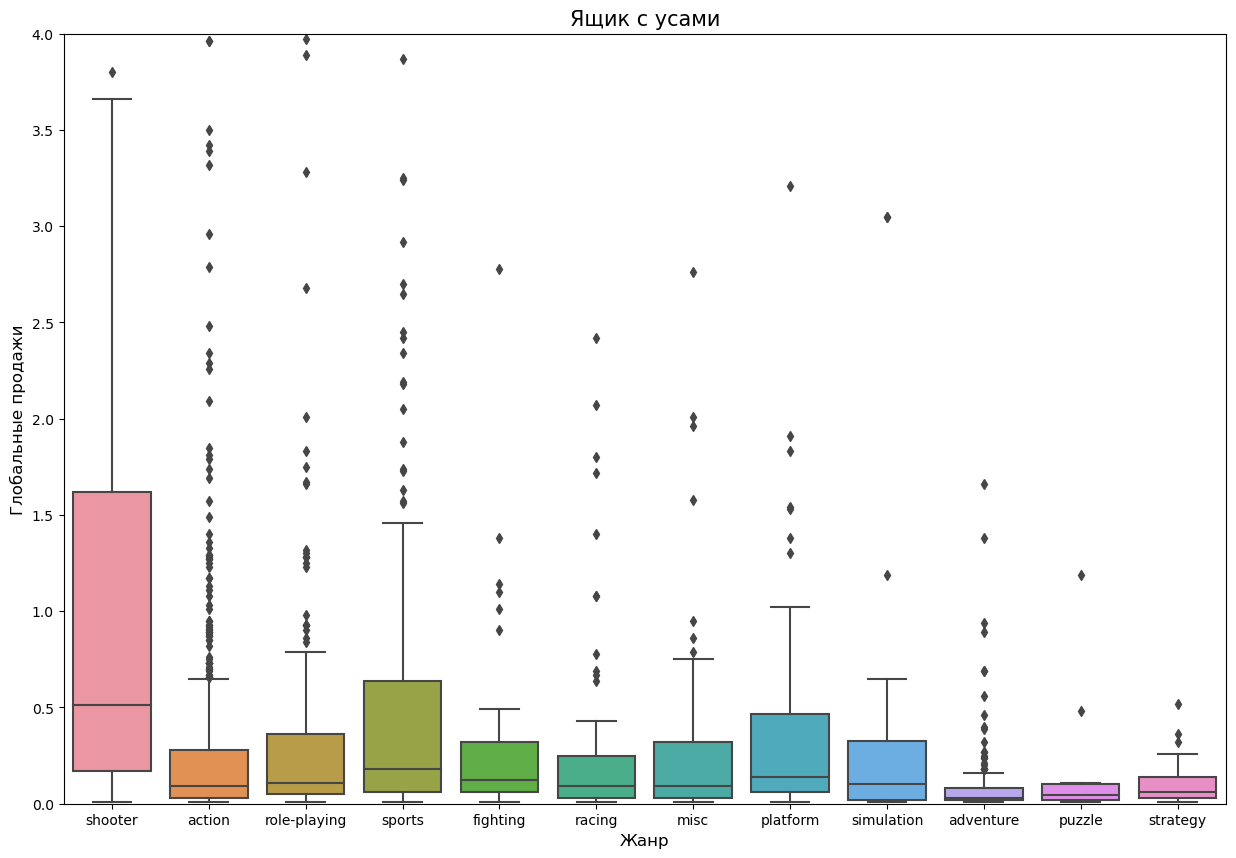

In [54]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_from_2014, x='genre', y='sales_total')
plt.title('Ящик с усами', fontsize=15)
plt.ylim(0, 4)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

Мы видим что жанр shooter сильно выделяется как медианой так и 75 квартилью. Построим для этого жанра отдельный "ящик"

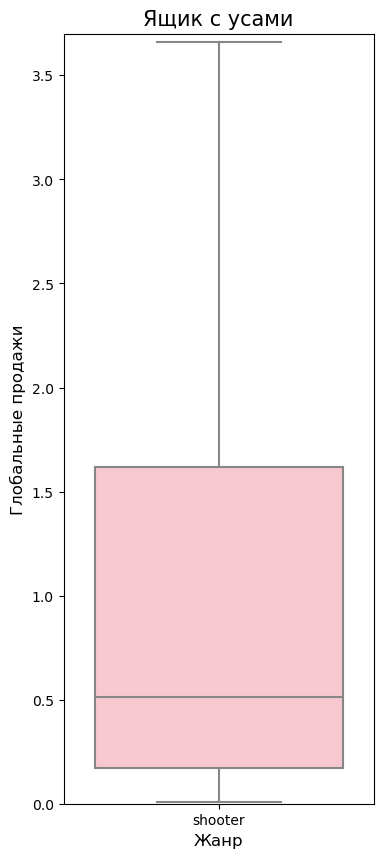

In [55]:
plt.figure(figsize=(4,10))
sns.boxplot(data=df_from_2014[df_from_2014['genre'] == 'shooter'], x='genre', y='sales_total', color='pink')
plt.title('Ящик с усами', fontsize=15)
plt.ylim(0, 3.7)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);


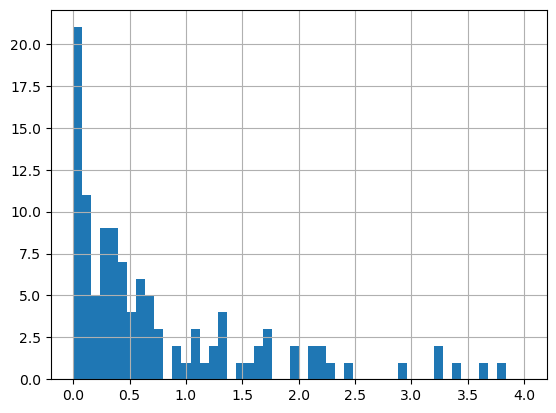

In [56]:
df_from_2014[df_from_2014['genre'] == 'shooter']['sales_total'].hist(bins=50, range=(0, 4));

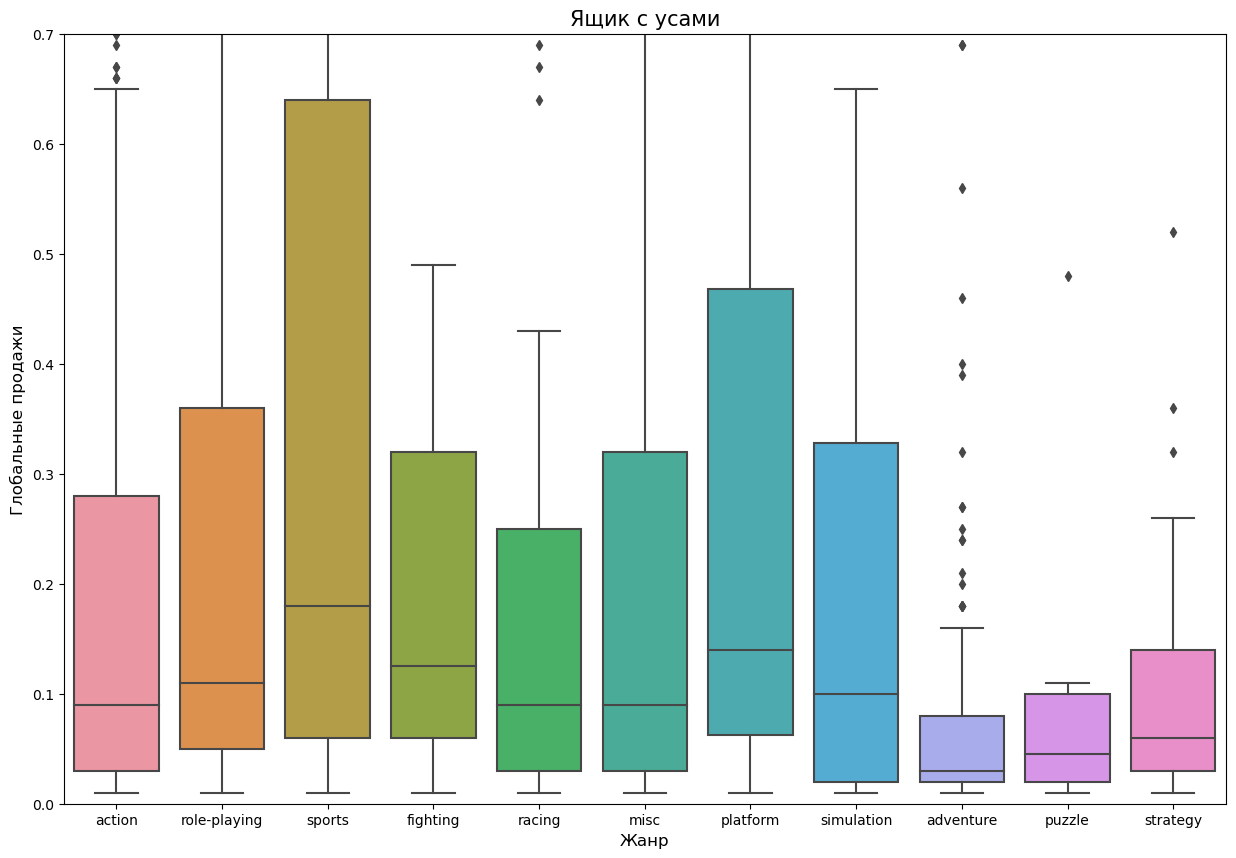

In [57]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_from_2014[df_from_2014['genre'] != 'shooter'], x='genre', y='sales_total')
plt.title('Ящик с усами', fontsize=15)
plt.ylim(0, 0.7)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

Медиана у топ-10 жанров сильно разбросана: на первом месте shooter с 0.5 млн, далее sports - 0.19, platform - 0.14 и так далее до 10го места - puzzle с 0.05 млн. 75 квартили (и максимум) также очень сильно разбросаны: от 3.6 млн у shooter, 1.7 у sports и менее  0.1 у puzzle    

## Составим портрет пользователя каждого региона

**Необходимо определить для пользователя каждого региона (NA, EU, JP):**
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [58]:
data_games = pd.read_csv('games.csv')

In [59]:
# data_games = pd.read_csv('games.csv')

In [60]:
data_games.columns = map(str.lower, data_games.columns)

In [61]:
data_games = data_games.query('year_of_release >= 2015').dropna(subset = ['year_of_release', 'name', 'genre'])

In [62]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [63]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [64]:
# check
# круги + категория другие
def graph (df, region, name, axes):
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, labels = sales.platform,
               
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    plt.tight_layout()

C:\Users\Mi\AppData\Local\Temp\ipykernel_26384\4214658123.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()
C:\Users\Mi\AppData\Local\Temp\ipykernel_26384\4214658123.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()
C:\Users\Mi\AppData\Local\Temp\ipykernel_26384\4214658123.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()


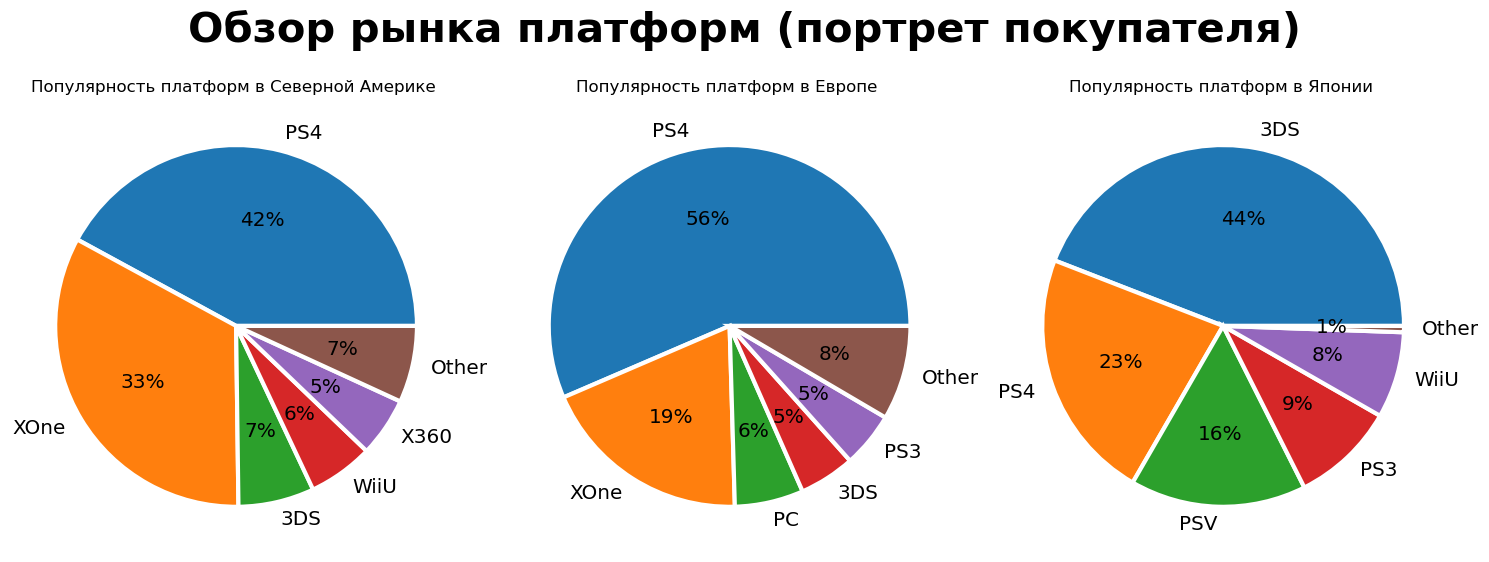

In [65]:
# check
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

graph(data_games, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, 'eu_sales', 'Европе', axes[1])
graph(data_games, 'jp_sales', 'Японии', axes[2])

In [66]:
df_from_2014['rating_esrb'] = df_from_2014['rating_esrb'].fillna('undefined')

C:\Users\Mi\AppData\Local\Temp\ipykernel_26384\3020370423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_from_2014['rating_esrb'] = df_from_2014['rating_esrb'].fillna('undefined')


In [67]:
df_from_2014.columns = map(str.lower, df_from_2014.columns)
df_from_2014 = df_from_2014.dropna(subset = ['year_of_release', 'name', 'genre'])
df_from_2014['user_score'] = df_from_2014['user_score'].replace('tbd', np.nan).astype('float')

In [68]:
def graph (df, region, name, axes):
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, labels = sales.platform,
               
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    plt.tight_layout()

C:\Users\Mi\AppData\Local\Temp\ipykernel_26384\3822699440.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()
C:\Users\Mi\AppData\Local\Temp\ipykernel_26384\3822699440.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()
C:\Users\Mi\AppData\Local\Temp\ipykernel_26384\3822699440.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'platform': 'Other', region: df[region].sum()


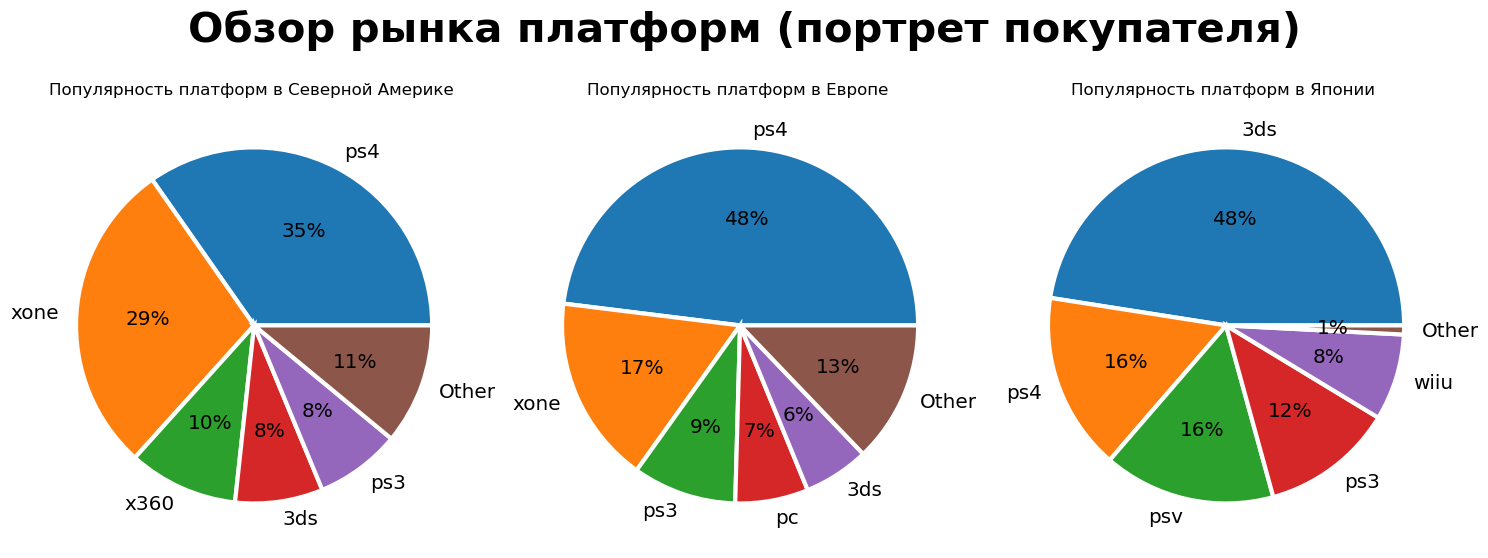

In [69]:
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

graph(df_from_2014, 'na_sales', 'Северной Америке', axes[0])
graph(df_from_2014, 'eu_sales', 'Европе', axes[1])
graph(df_from_2014, 'jp_sales', 'Японии', axes[2])

In [70]:
def graph (df, region, name, axes):
    
    sales = df.pivot_table(index='genre', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'genre': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['genre', 'sales']
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, labels = sales.genre,
               
               legend=False, 
               title = f"Популярность жанров в {name} ", 
               ax = axes).set(ylabel='')
    plt.tight_layout()

C:\Users\Mi\AppData\Local\Temp\ipykernel_26384\3883905544.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'genre': 'Other', region: df[region].sum()
C:\Users\Mi\AppData\Local\Temp\ipykernel_26384\3883905544.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'genre': 'Other', region: df[region].sum()
C:\Users\Mi\AppData\Local\Temp\ipykernel_26384\3883905544.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales.append({'genre': 'Other', region: df[region].sum()


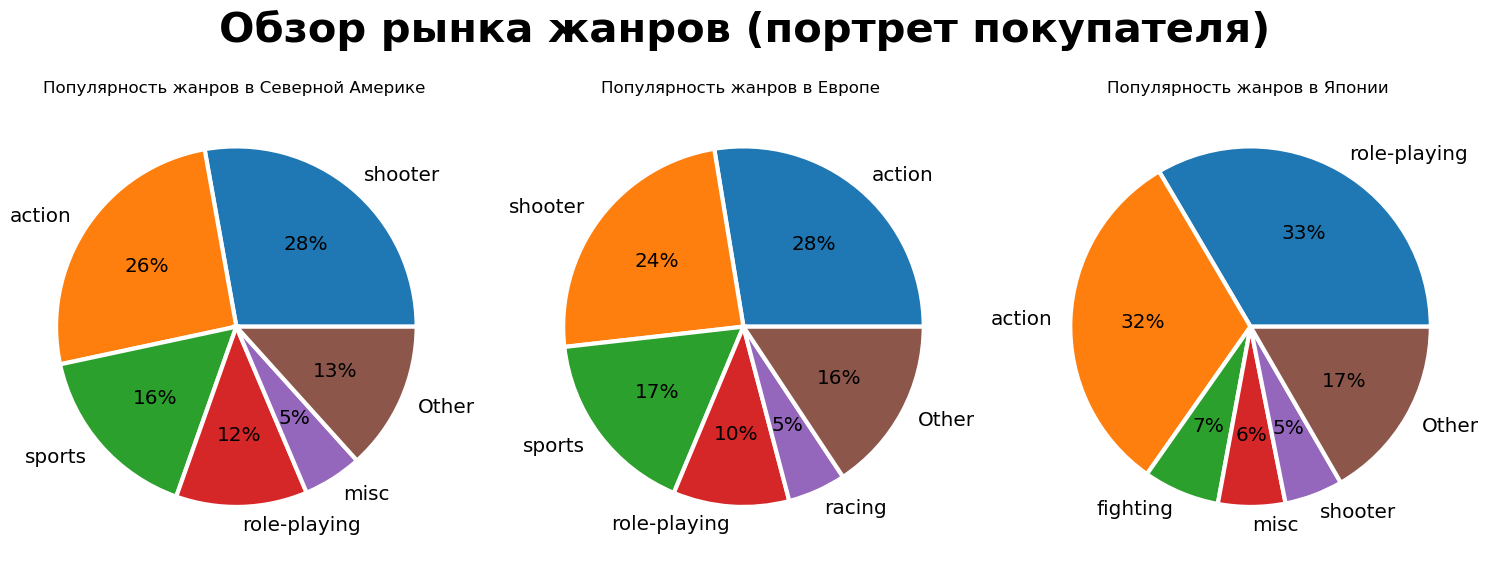

In [71]:
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка жанров (портрет покупателя)', fontsize = 30, fontweight='bold')

graph(df_from_2014, 'na_sales', 'Северной Америке', axes[0])
graph(df_from_2014, 'eu_sales', 'Европе', axes[1])
graph(df_from_2014, 'jp_sales', 'Японии', axes[2])

In [72]:
def graph (df, region, name, axes):
    
    sales = df.pivot_table(index='rating_esrb', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
        
    sales.columns = ['rating_esrb', 'sales']
    sales.plot(kind='pie',
               y="sales",               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, labels = sales.rating_esrb,
               
               legend=False, 
               title = f"Популярность по рейтингу ESRB {name} ", 
               ax = axes).set(ylabel='')
    plt.tight_layout()
    
    

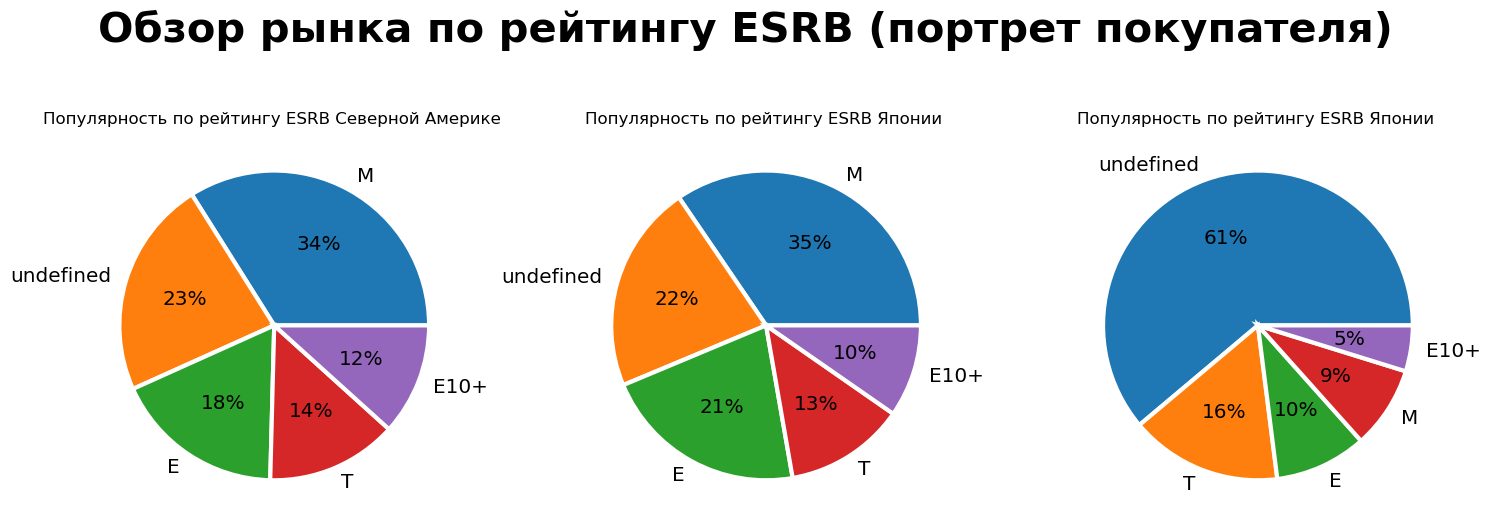

In [73]:
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка по рейтингу ESRB (портрет покупателя)', fontsize = 30, fontweight='bold')

graph(df_from_2014, 'na_sales', 'Северной Америке', axes[0])
graph(df_from_2014, 'eu_sales', 'Японии', axes[1])
graph(df_from_2014, 'jp_sales', 'Японии', axes[2])



In [74]:
df_from_2014['rating_esrb'].unique() 

array(['undefined', 'M', 'E', 'T', 'E10+'], dtype=object)

**Описание категорий**

**EC**	Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Примеры: Дора Исследовательница, Сказки Дракона.

**E**	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.

**E 10+**	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.

**T**	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.

**M**	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.

**AO**	Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. Примеры: Grand Theft Auto V, Fallout 4.

**RP**	Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

**Портрет пользователя в регионах за период 2014-2016:**

**1. Северная Америка**

Самые популярные платформы: PS4, XOne, Х360, 3DS, PS3. 

Топ 5 жанров: shooter, action, sports, Role-playing, misc. 

По рейтингу ESRB видно, что самые популярные игры относятся к возрастной категории "для лиц старше 17 лет", на втором месте игры не попавшие  в какую либо категорию, третьем месте игры из категории "для всех", на 4м - "от 13 до 17 лет" и на пятом - игры для детей игры для детей старше 10 лет.

**2. Европа**

Самые популярные платформы: PS4, XOne, PS3, PC, 3DS. 

Топ 5 жанров: action, shooter, sports, Role-playing, Racing. 

По рейтингу ESRB, топ-5 аналогичен распределению в Северной Америке: самые популярные игры относятся к возрастной категории "для лиц старше 17 лет", на втором месте игры не попавшие  в какую либо категорию, третьем месте игры из категории "для всех", на 4м - "от 13 до 17 лет" и на пятом - игры для детей игры для детей старше 10 лет.

**3. Япония**

Самые популярные платформы: 3DS, PS4, PSV, PS3, Wii. 

Топ 5 жанров: Role-Playing, action, fighting, misc, shooter. 

По рейтингу ESRB в Японии первое место у категории Undefined, на 2м месте "от 13 до 17 лет", на 3м игры из категории "для всех", на 4м - "старше 17 лет" и на 5м - игры для детей старше 10 лет 

Для прогноза будущих продаж лучше брать данные за последний год, так как технологии меняются с оч быстрыми темпами, и вкусы людей также могут меняться оч быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанров Shooter, Action, Sport и Role-Playing на платформах PS4, XOne, и 3DS. С опредилением категорий есть некоторые сложности, т.к. в Северной Америке и Европе на вторм месте, и в Японии на первом месте стоят игры которые не имеют категоризацию по рейтингу ESRB. На первом месте В Северной Америке и Европе стоит категория "для всех"

## Проверка гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC

**Сформулируем гипотезы:**

**Нулевая гипотеза H₀:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**Альтернативная гипотеза H₁:** Средние пользовательские рейтинги платформ Xbox One и PC различаются

Сохраним в переменных user_xone и user_pc соответствующие данные (актуальные данные за последние 9 лет)
Посчитаем средние рейтинги пользователей для Xbox One и PC платформ

In [75]:
df_from_2013 = df.loc[(df['year_of_release'] >= 2013) & (df['user_score'] > 0)]
df_from_2013.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating_esrb,sales_total
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
60,call of duty: ghosts,x360,2013,shooter,6.73,2.56,0.04,0.91,73.00,2.60,M,10.24
69,call of duty: ghosts,ps3,2013,shooter,4.10,3.63,0.38,1.25,71.00,2.60,M,9.36


In [76]:
user_xone = df_from_2013[df_from_2013['platform']=='xone']['user_score']
user_pc = df_from_2013[df_from_2013['platform']=='pc']['user_score']
print('Средний Xbox One:', user_xone.mean()) 
print('Средний PC:', user_pc.mean())

Средний Xbox One: 6.52142857142857
Средний PC: 6.2803797468354405


Выполним проверку гипотезы. Будем использовать метод ttest_ind

In [77]:
alpha = .05

results = st.ttest_ind(user_xone.dropna(), user_pc.dropna())

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.15503167687396294
Не получилось отвергнуть нулевую гипотезу


**Вывод:** 

Значение p-value не многим более 15.5%. Таким образом, опровергнуть Нулевую гипотезу не получилось: средние пользовательские рейтинги платформ Xbox One и PC не отличаются между собой.


Значение p-value составлят 15.5% при пороговом значении 5%. Это говорит о том, что с вероятностью 15.5% можно получить различность в рейтнгах платформ XOne и PC 

Значение p-value показывает: вероятность случайно получить такое или большее различие. В нашем случае она равна 15.5%

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем гипотезы:

**Нулевая H₀:** Средние пользовательские рейтинги жанров Action и Sports одинаковые

**Альтернативная гипотеза H₁:** Средние пользовательские рейтинги жанров Action и Sports различаются

In [78]:
user_action = df[(df['year_of_release'] >= 2008) & (df['genre']=='action') & (df['user_score'] > 0)]['user_score']
user_sports = df[(df['year_of_release'] >= 2008) & (df['genre']=='sports') & (df['user_score'] > 0)]['user_score']
print('Средний рейтинг жанра Action:', user_action.mean())
print('Средний рейтинг жанра Sports:', user_sports.mean())

Средний рейтинг жанра Action: 6.860547945205495
Средний рейтинг жанра Sports: 6.217000000000002


In [79]:
alpha = .05

results = st.ttest_ind(user_action, user_sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.702015652015376e-16
Отвергаем нулевую гипотезу


**Вывод:** 
В данном случае p-value значительно больше порогового значения в 5%, поэтому мы отвергли Нулевую гипотезу звучащую как "пользовательские рейтинги жанров Action и Sports одинаковы". И, соответственно вероятность получить одинаковые средние рейнтинги по двум жанрам стремится к нулю.

**Вывод по проверке гипотез**

Проверили гипотезы:

- Гипотеза H₀: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не получилось отвергнуть.
- Гипотеза H₁: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергали нулевую гипотезу и оставили альтенативную - вероятность получить одинаковые средние практически равна нулю.

**Пояснения:**

И в первом и втором случаях использовался метод проверки гипотезы о равенстве средних двух генеральных совокупностей: нулевая гипотеза формулируется о равенстве, альтернативная о не равенстве. В первом случае задача соответствовала нулевой гипотезе, вторая - альтернативной.

Пороговое значение определил как 5%

## Общий вывод



Перед анализом данные прошли подготовку: названия колонок были приведены к нижнему регистру, данные в категиральных переменных были также приведены к нижнему регистру, колонка с ESRB категориями была переименована соответствующим образом, были изменены тип данных у части колонок: 'year_of_release' на Int32, 'user_score' на float. Там где было возможно заполнили пропуски. 

Определили, что аббревиатура TBD, скорее всего, значит to be done. То есть данные были нарочно не заполнены. Поэтому заменили tbd на nan для проведения дальнейшего анализа.

В процессе исследовательского анализа мы определили следующее:
1. За 10 лет начиная с 1980 г. роста продаж игр не наблюдалось. В течении следующих 18 лет, до 2008 г., наблюдался взрывной рост продаж связанный с выходом таких платформ как Play Station (ротация PS, PS2, PSP) и Nintendo (DS и Wii). С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок консольных игр

2. Топ-5 самых поплулярных платформ за весь период наблюдений - PS2, X360, PS3, Wii и DS

3. Средний жизненый цикл у игровых платформ составляет порядка 8 лет. Долгожителем являются игры выпущенные для персональных компьютеров - 26 лет. Самый пик продаж наступает примерно через 5 лет после выпуска консоли

4. Для выстраивания стратегии продаж в качестве актуального я выбрал период начиная с 2014 года в виду высокой скорости "ротации" игровых платформ

5. Проведя анализ оценок пользователей и критиков. Мы выявили, что оценки критиков и пользователей практически не влияют на продажи игр. И, напротив, есть умереная взаимосвязь между оценками

6. Топ-5 самые популярные жанры: Action, Shooter, Sports, Role-Playing и Misc.

7. В рамках анализа данных были определены портреты пользователей в Северной Америке, Европе и Японии на конец 2016 года:
В Северной Америке самые популярные жанры: Shooter, Action, Sports. Игровые приставки : PS4, XOne и Х360. А по возрастным категориям:  "для всех", "Undefined", "старше 17 лет"
В Европе популярные жанры: Action, Shooter, Sports. Рейтинг приставок: PS4, XOne, PS3. По возрастным категориям:  "для всех", "Undefined", "старше 17 лет"
В Японии игроки предпочитают игровые приставки: 3DS, PS4, PSV. А жанры игры:  Role-Playing, action, fighting. Возрастные категории: Undefined, на 2м месте "от 13 до 17 лет", на 3м игры из категории "для всех".

8. Также в процессе анализа была проведена оценка гипотезы о равенстве средних пользовательских оценок игровых плаформ XOne и PC (нулева гипотеза) и эта гипотеза не была отвергнута. Гипотеза о неравенстве средних пользовательских рейтингов жанров Action и Sports, в качестве альтернативной, также не была отвергнута.

9.  В итоге, при формировании стратегии на 2017 год, я бы сконцентрировал свое внимание на платформы: PS4, XOne, 3DS,  PSV и PC. Основные жанры в этом случае будут: Action, Shooter, Sports, и игры в следующих возрастных категориях: 'M' - для лиц старше 17 лет, 'E' - категория для всех, 'T' - тинейджеры (от 13 до 17 лет), 'M' - взрослые от 17 и выше. И наконец, я бы в первую очередь развивал продажы в следующих регионах: Северная Америка, Европа и Япония

